## Cascade Classifier

https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08

### We import the CV2 library and import the image


In [ ]:
import cv2

In [ ]:
image = cv2.imread('face.jpg')

By getting the shape of image in 3 dimensions , one for height , one for width and third means there are 3 channels for colors RGB meaning it is a coloured image

In [ ]:
image = cv2.resize(image , (1224,678))
image.shape


(678, 1224, 3)

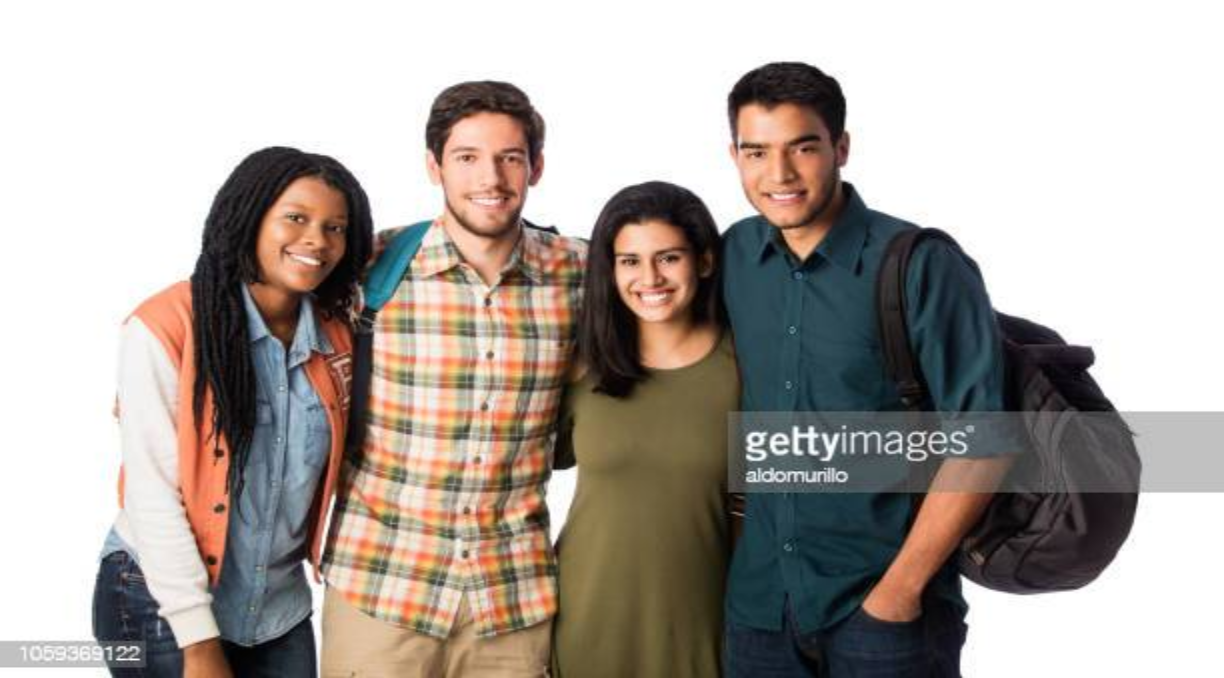

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

pixels of information in coloured image , pixels of information in black and white image , difference between 2 images

In [ ]:
384 * 612 * 3 , 384 * 612 , 384 * 612 * 3 - 384 * 612

(705024, 235008, 470016)

In [ ]:
image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

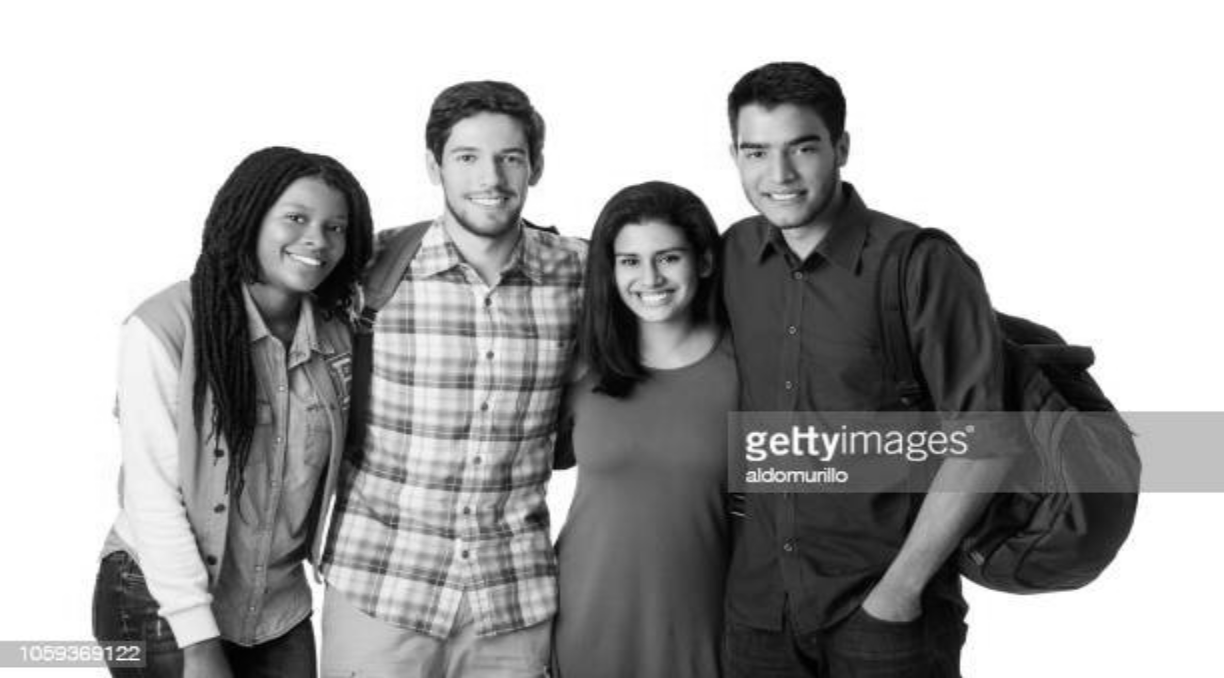

In [ ]:
cv2_imshow(image_gray)

In [ ]:
image.shape

(678, 1224, 3)

In [ ]:
image_gray.shape

(678, 1224)

Generate a model using pre built model recognising front face

We get the detections of the face 

Each list gives us the x coordinate , y coordinate , width and height

scaleFactor corresponds to how the image size is reduced

minNeighbors corresponds to how many neighbors each candidate rectangle should have to retain it

minSize is the minimum size of the each face of object

maxSize is the maximum size of the each face of object

In [ ]:
faceDetector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
detections = faceDetector.detectMultiScale(image_gray , scaleFactor = 1.1 , minNeighbors = 6 , minSize = (10,10) , maxSize = (100,100))
detections

array([[729, 114,  95,  95],
       [258, 183,  96,  96],
       [442, 121,  94,  94],
       [603, 227,  85,  85]], dtype=int32)

In [ ]:
len(detections)

4

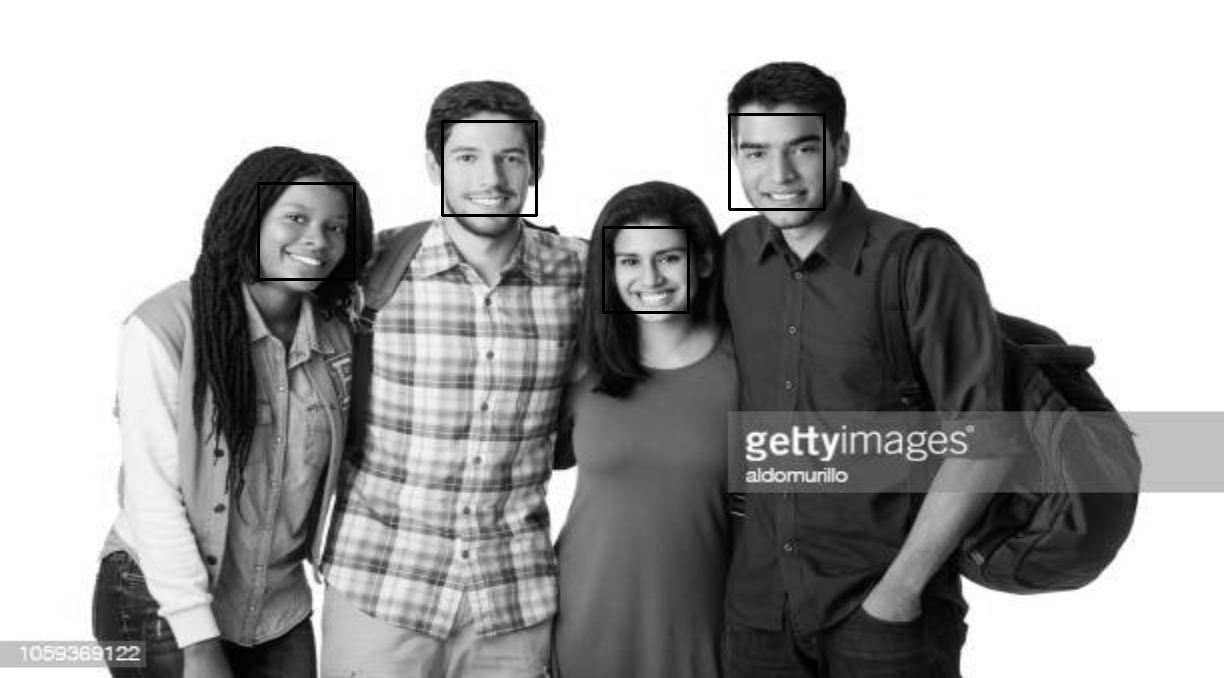

In [ ]:
for (x , y , w , h) in detections:
  #print(x , y , w , h)
  cv2.rectangle(image_gray , (x,y) , (x+w,y+h) , (0,255,255) , 2)
cv2_imshow(image_gray)

In [ ]:
eyeDetector = cv2.CascadeClassifier('haarcascade_eye.xml')
detections = eyeDetector.detectMultiScale(image_gray , scaleFactor = 1.15 , minNeighbors = 6)
detections

array([[792, 139,  22,  22],
       [453, 144,  27,  27],
       [497, 146,  27,  27],
       [735, 131,  43,  43],
       [282, 205,  28,  28],
       [324, 218,  22,  22],
       [616, 248,  27,  27],
       [660, 249,  22,  22],
       [351, 547,  40,  40]], dtype=int32)

792 139 22 22
453 144 27 27
497 146 27 27
735 131 43 43
282 205 28 28
324 218 22 22
616 248 27 27
660 249 22 22
351 547 40 40


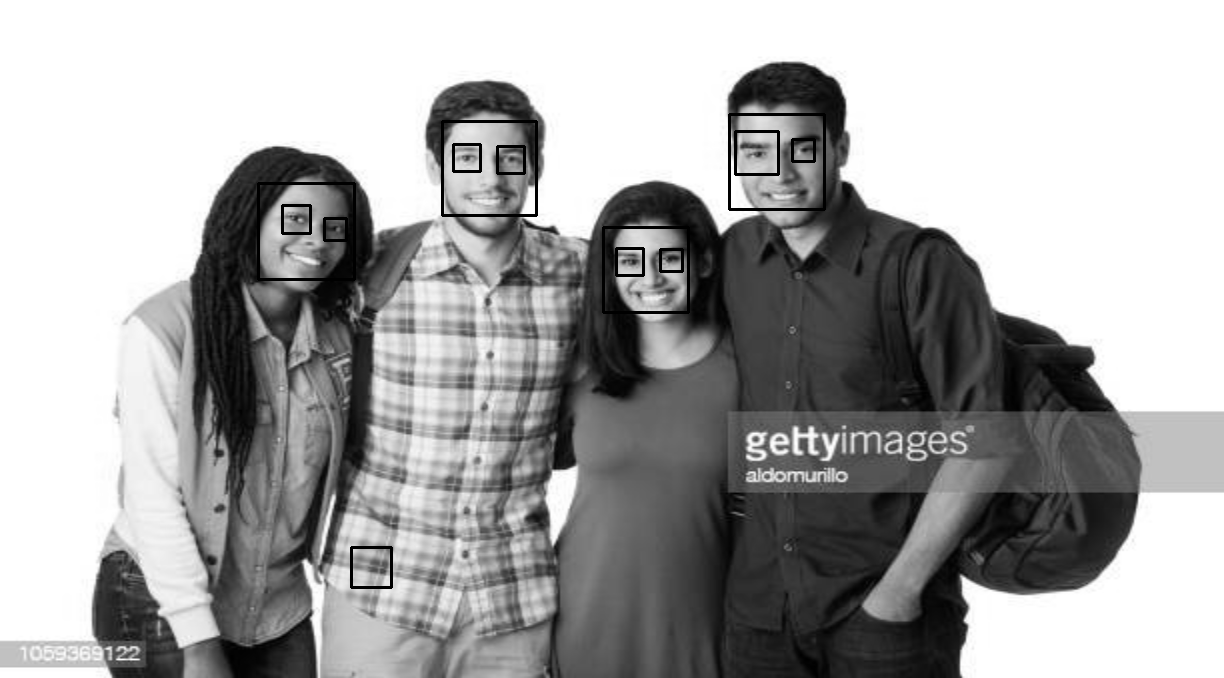

In [ ]:
for (x , y , w , h) in detections:
  print(x , y , w , h)
  cv2.rectangle(image_gray , (x,y) , (x+h,y+w) , (0,255,255) , 2)
cv2_imshow(image_gray)